# COVID19 EXPLORATORY DATA ANALYSIS WITH PYTHON

This notebook conatins an Exploratory Data Analysis of the pandemic Covid19 based on the dataset available from the Johns Hopkins University(https://github.com/CSSEGISandData/COVID-19).
I have made no statistical or predictive modeling as of now keeping in mind the sesitivity of the situation and some problems that predictions can create.



The main reasons for using the JHU data are:

JHU is already a trusted and respected institution,
They cite many sources, which are themselves reputable,
The data is updated daily, and
It is provided directly in the github repository (.csv in a github repository).

## Exploratory data analysis and visualization using Python

### Imports and data

Let's import the necessary packages from the SciPy stack and get [the data](https://github.com/CSSEGISandData/COVID-19).

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Data urls
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'

# Import datasets as pandas dataframes
raw_confirmed_df = pd.read_csv(confirmed_cases_data_url)
raw_deaths_df = pd.read_csv(death_cases_data_url)
raw_recovered_df = pd.read_csv(recovery_cases_data_url)

### Analysing the Confirmed cases of COVID-19

In [3]:
raw_confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19


Using .info() and .describe()

In [4]:
raw_confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 85 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [5]:
raw_confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.00000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,31.189394,37.602273,45.598485,63.587121,75.306818,90.500000,104.678030,116.643939,130.268939,140.606061,152.083333,161.977273,169.704545,171.291667,228.666667,253.352273,261.477273,269.787879,277.492424,284.606061,286.511364,288.625000,290.981061,297.621212,299.083333,301.367424,304.568182,308.287879,313.431818,318.606061,...,351.666667,360.30303,370.780303,385.609848,400.935606,415.988636,430.265152,449.318182,476.799242,486.181818,550.018939,591.291667,634.295455,687.780303,746.598485,813.715909,918.825758,1031.090909,1153.435606,1276.337121,1432.708333,1583.503788,1771.412879,2006.026515,2247.314394,2502.625000,2727.803030,2963.594697,3248.056818,3532.594697,3838.886364,4151.200758,4535.636364,4818.617424,5095.079545,5401.878788,5723.878788,6042.992424,6408.026515,6710.280303
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,305.039177,361.649891,445.031795,691.628475,836.090850,1030.450088,1214.314123,1365.053729,1539.904599,1672.112040,1827.771281,1956.752149,2057.538077,2057.878104,2969.197507,3350.309094,3463.687395,3582.574402,3693.698656,3797.813484,3819.303315,3844.562783,3858.163972,3945.574061,3945.611058,3958.157152,3988.888114,4013.736880,4039.456597,4060.005193,...,4152.615621,4164.07306,4178.197951,4195.462839,4212.841747,4229.299943,4248.786558,4264.870430,4298.182677,4308.465130,4401.963903,4483.863404,4579.324691,4693.240155,4828.813745,5010.624397,5302.898909,5658.503415,6087.678162,6524.811610,7132.931332,7748.255437,8570.850266,9684.033343,10845.853079,12124.376898,13323.687535,14632.341178,16244.987592,17859.555003,19711.027486,21667.237096,23940.073183,25670.348203,27466.891516,29364.316603,31408.470549,33419.461011,35633.968667,37520.876709
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

### Number of confirmed cases by country

In [6]:
raw_confirmed_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [7]:
raw_confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19


From the head and tail observations, its visible that each entry contains the data belonging to the Province/State of a country.

We will take all the rows (*regions/provinces*) that correspond to that country and add up the numbers for each. To put this in data-analytic-speak, we want to **group by** the country column and sum up all the values for the other columns.



In [8]:
# Group by region (we'll also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_df = raw_confirmed_df.groupby(['Country/Region']).sum().drop(["Lat", "Long"], axis=1)
confirmed_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19


So each row of our new dataframe `confirmed_df` is a time series of the number of confirmed cases for each country.
Now we'll have a look at the index of our dataframe.

In [9]:
confirmed_df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=185)

It's indexed by `Country/Region`. That's all good **but** if we index by date **instead**, it will allow us to produce some visualizations almost immediately. 

To make the index the set of dates, notice that the column names are the dates. To turn column names into the index, we essentially want to make the columns the rows and vice versa. This corresponds to taking the transpose of the dataframe:

In [10]:
confirmed_df = confirmed_df.transpose()
confirmed_df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0


Now, let's have a look at our index to see whether it actually consists of DateTimes or not

In [11]:
confirmed_df.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20'],
      dtype='object')

Note that `dtype='object'`which means that these are strings, not DateTimes. We will use `pandas` to turn it into a DateTimeIndex:

In [12]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_df.index)
confirmed_df.set_index(datetime_index, inplace=True)
# Check out index
confirmed_df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

Now we have a DateTimeIndex and Countries for columns, we can use the dataframe plotting method to visualize the time series of confirmed number of cases by country.

### Plotting confirmed cases by country

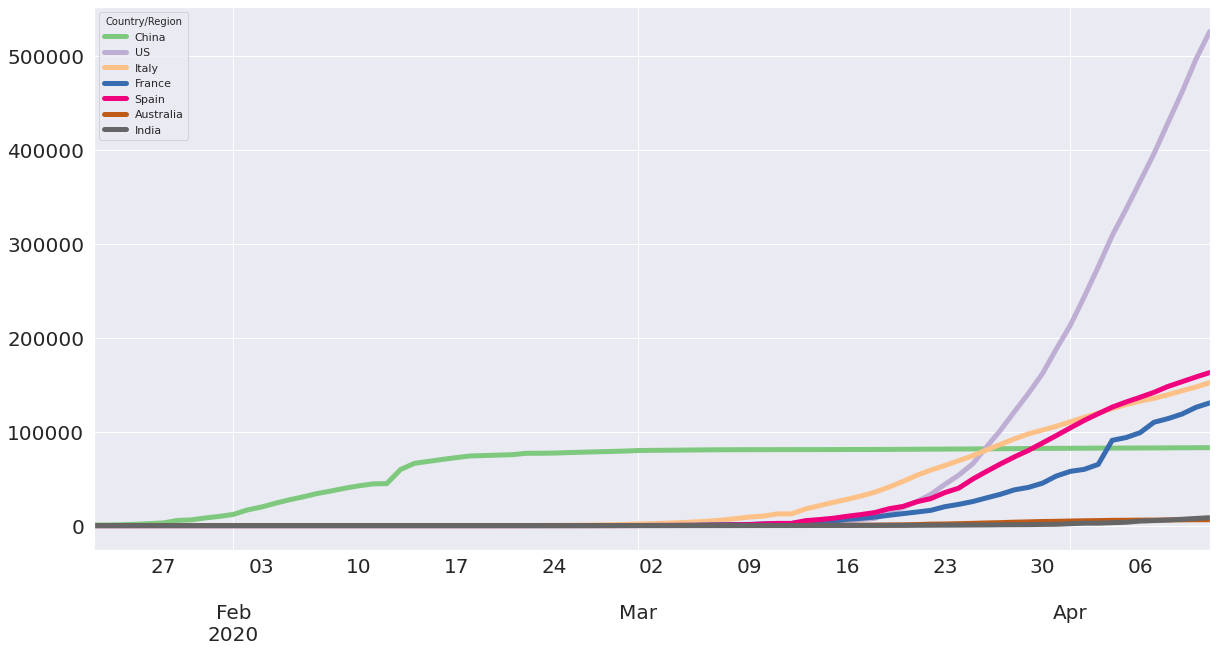

In [13]:
# Plotting time series of several countries (as plotting for all the countries will make the visualization a mess)
countries = ['China', 'US', 'Italy', 'France', 'Spain', 'Australia', 'India']
confirmed_df[countries].plot(figsize=(20,10), linewidth=5, colormap='Accent', fontsize=20)

Now, Let's label our axes and give the figure a title. We'll also thin the line and add points for the data.

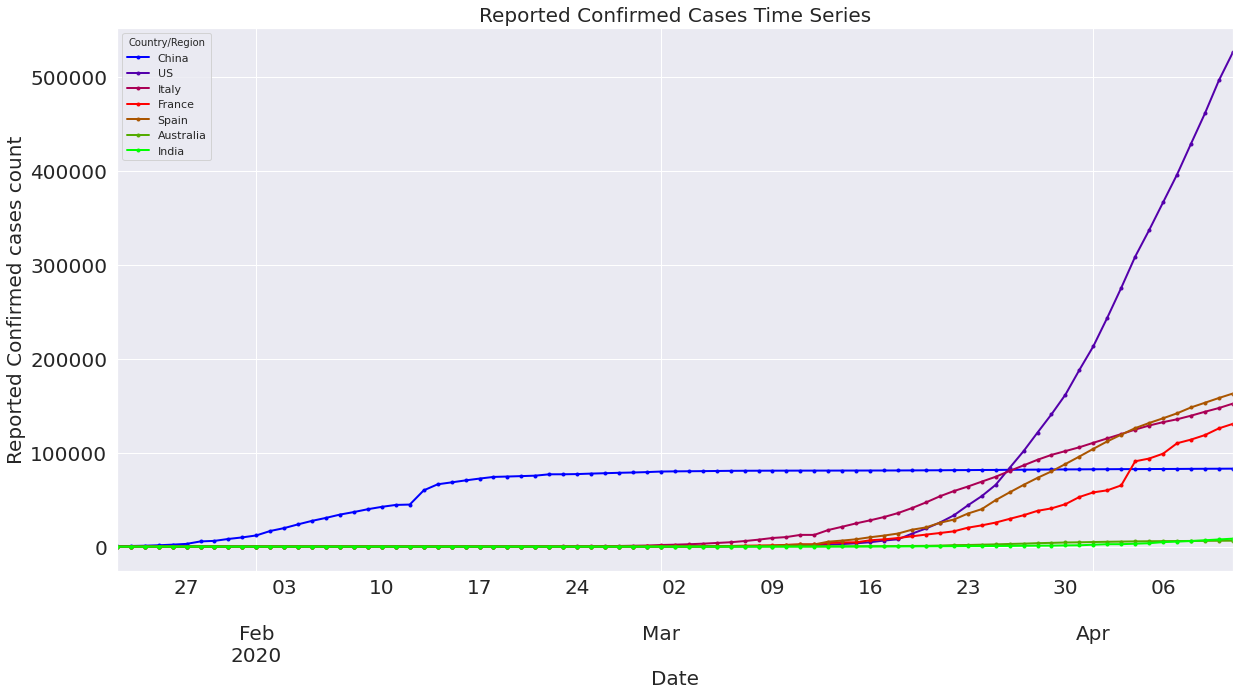

In [14]:
# Plot time series of several countries of interest
confirmed_df[countries].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

Now, since the US data seems to be going really high. lets take the y-axis on logarithmic scale:

Text(0.5, 1.0, 'Reported Confirmed Cases Time Series Plot')

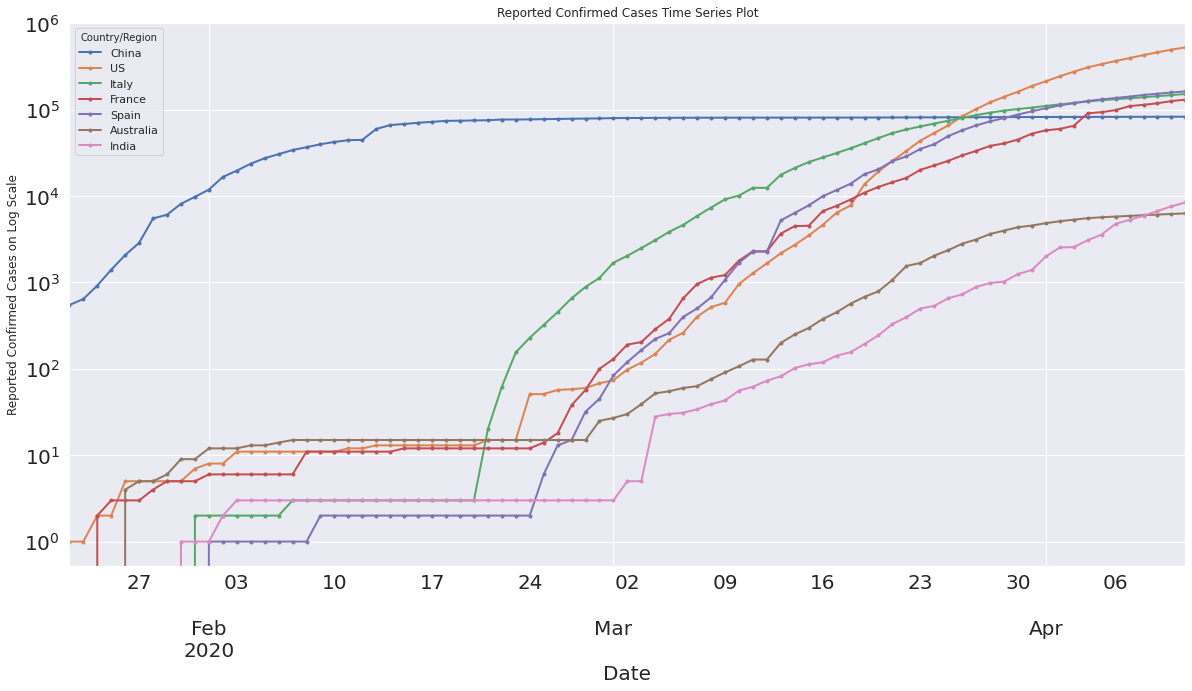

In [15]:
# Plot time series of several countries of interest
confirmed_df[countries].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy =True )
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Reported Confirmed Cases on Log Scale')
plt.title('Reported Confirmed Cases Time Series Plot')

Till now, we have explored the confirmed cases data and :
- looked at the dataset containing the number of reported confirmed cases for each region,
- wrangled the data to look at the number of reported confirmed cases by country,
- plotted the number of reported confirmed cases by country (both log and semi-log),
- Used log plots for the data.

### Number of reported deaths

As we did above for `raw_data_confirmed`, let's check out the head and the info of the `raw_data_deaths` dataframe:

In [16]:
raw_deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [17]:
raw_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 85 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

The structure of this data is similar to the `raw_confirmed_df`, so we can apply the same steps used above.



### Number of reported deaths by country

In [18]:
#group-by countries
deaths_df = raw_deaths_df.groupby(['Country/Region']).sum().drop(['Lat','Long'], axis=1)
deaths_df.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [19]:
# Transpose
deaths_df = deaths_df.transpose()

deaths_df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(deaths_df.index)
deaths_df.set_index(datetime_index, inplace=True)

# Check out head
deaths_df.head()

In [20]:
deaths_df.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20'],
      dtype='object')

### Plotting number of reported deaths by country 

Visualizing the number of reported deaths:

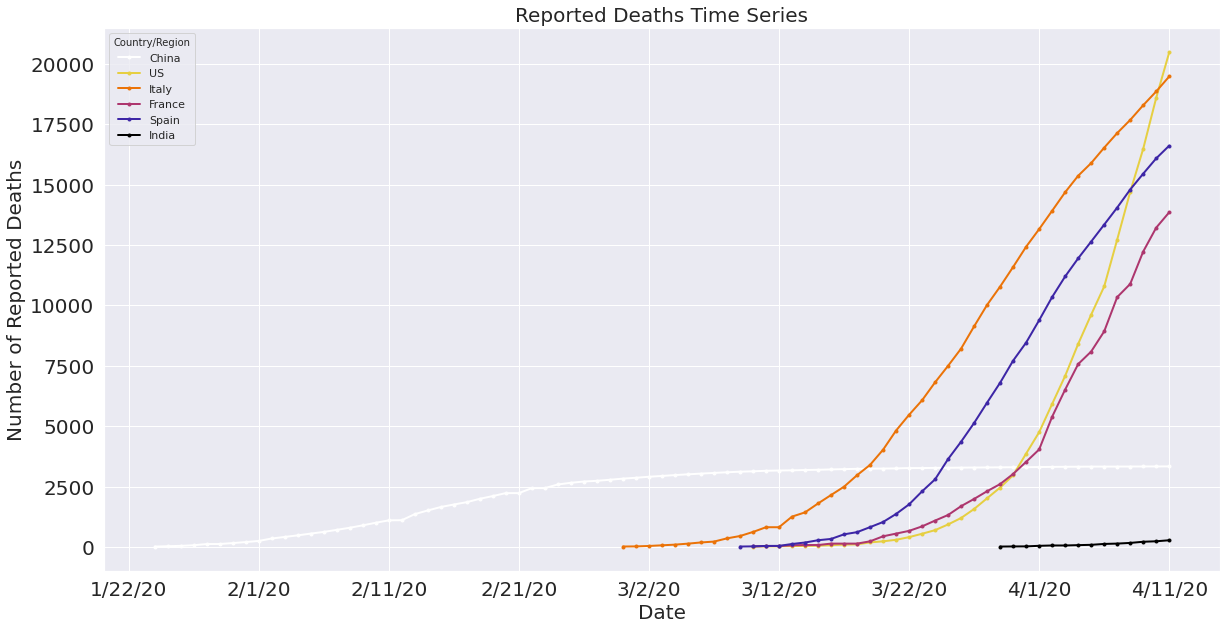

In [25]:
# Plot time series of several countries of interest
deaths_df[countries].plot(figsize=(20,10), linewidth=2, marker='.', colormap='CMRmap_r', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

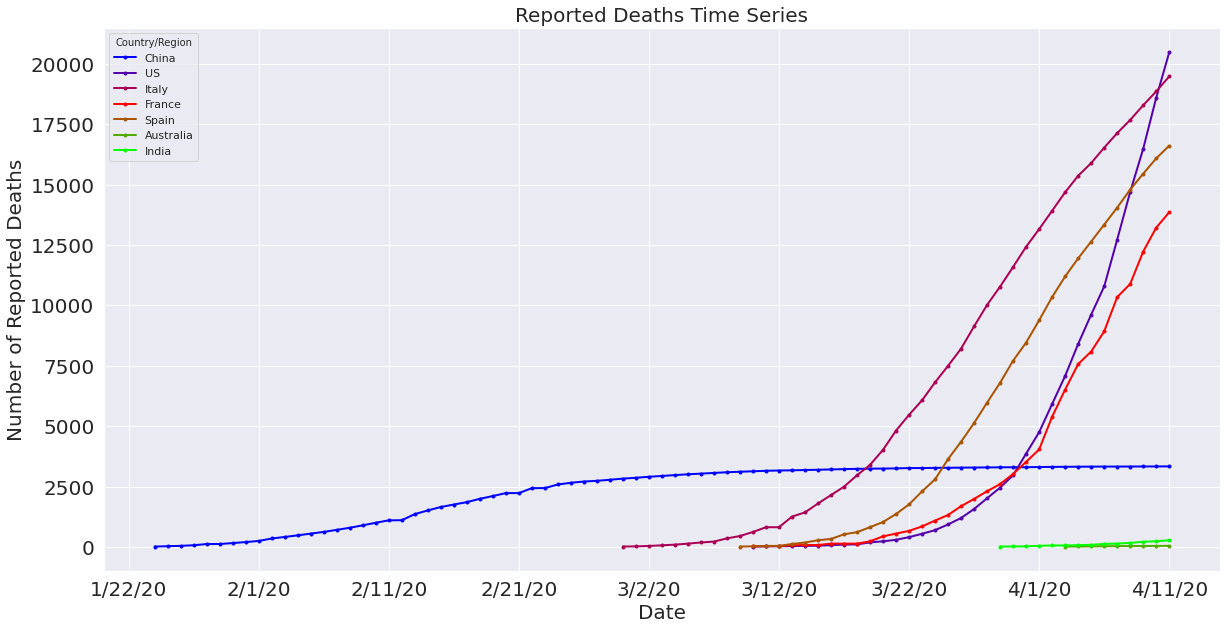

In [23]:
# Plot time series of several countries of interest
deaths_df[countries].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

Now on a semi-log plot:

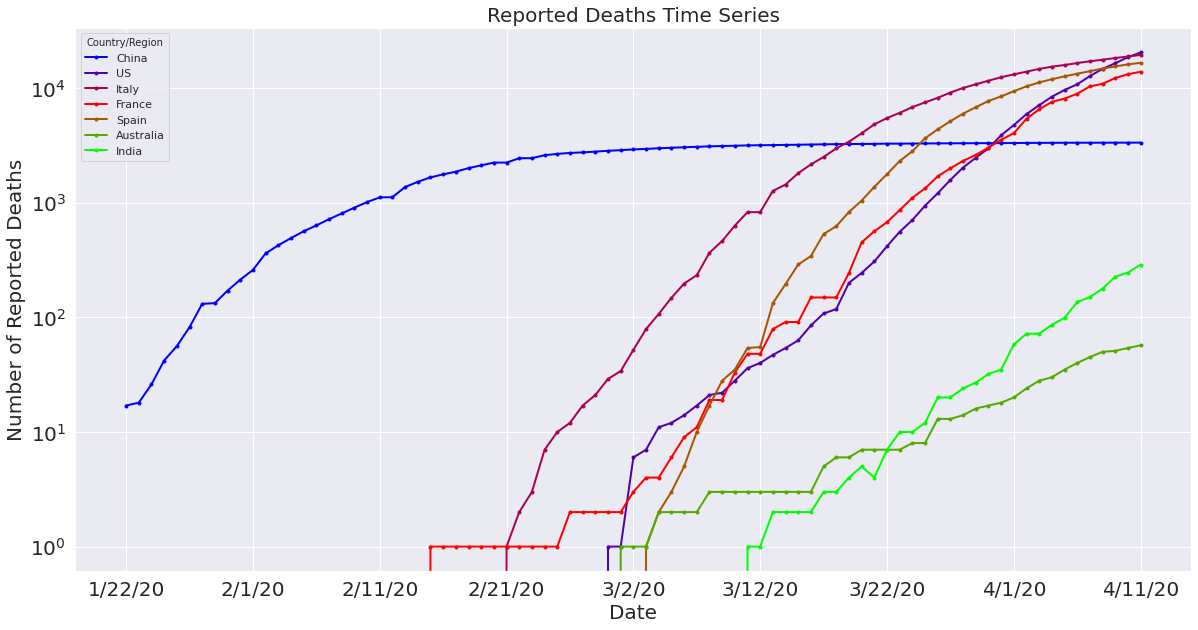

In [21]:
# Plot time series of countries on log scale
deaths_df[countries].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

### Aligning growth curves to start with day of number of known deaths ≥ 25

To compare what's happening in different countries, we can align each country's growth curves to all start on the day when the number of known deaths ≥ 25, such as reported in the first figure [here](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html).
To achieve this, first off, let's set set all values less than 25 to NaN so that the associated data points don't get plotted at all when we visualize the data:

In [22]:
# Loop over columns & set values < 25 to None
for col in deaths_df.columns:
    deaths_df.loc[(deaths_df[col] < 25),col] = None

# Check out tail
deaths_df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
4/7/20,NaN,NaN,193.0,NaN,NaN,NaN,56.0,NaN,45.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,2035.0,NaN,NaN,NaN,NaN,33.0,NaN,686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0,NaN,NaN,43.0,3335.0,50.0,NaN,NaN,...,41.0,NaN,61.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,14045.0,NaN,NaN,NaN,591.0,821.0,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,725.0,12722.0,NaN,45.0,NaN,6171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/8/20,NaN,NaN,205.0,NaN,NaN,NaN,63.0,NaN,50.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,2240.0,NaN,NaN,NaN,NaN,34.0,NaN,819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.0,NaN,NaN,48.0,3337.0,54.0,NaN,NaN,...,41.0,NaN,65.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,14792.0,NaN,NaN,NaN,687.0,895.0,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,812.0,14695.0,NaN,52.0,NaN,7111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/9/20,NaN,NaN,235.0,25.0,NaN,NaN,72.0,NaN,51.0,295.0,NaN,NaN,NaN,NaN,NaN,NaN,2523.0,NaN,NaN,NaN,NaN,35.0,NaN,950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,503.0,NaN,NaN,57.0,3339.0,69.0,NaN,NaN,...,44.0,NaN,66.0,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,15447.0,NaN,NaN,NaN,793.0,948.0,NaN,NaN,NaN,32.0,NaN,NaN,NaN,25.0,908.0,16478.0,NaN,57.0,NaN,7993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/10/20,NaN,NaN,256.0,26.0,NaN,NaN,82.0,NaN,54.0,319.0,NaN,NaN,NaN,27.0,NaN,NaN,3019.0,NaN,NaN,NaN,NaN,36.0,NaN,1057.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,557.0,NaN,NaN,65.0,3340.0,80.0,NaN,NaN,...,47.0,NaN,71.0,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,16081.0,NaN,NaN,NaN,870.0,1002.0,NaN,NaN,NaN,33.0,NaN,NaN,NaN,25.0,1006.0,18586.0,NaN,69.0,NaN,8974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/11/20,NaN,NaN,275.0,26.0,NaN,NaN,83.0,NaN,57.0,337.0,NaN,NaN,NaN,30.0,NaN,NaN,3346.0,NaN,NaN,NaN,NaN,37.0,NaN,1124.0,NaN,28.0,27.0,NaN,NaN,NaN,NaN,NaN,654.0,NaN,NaN,73.0,3343.0,100.0,NaN,NaN,...,52.0,NaN,74.0,NaN,NaN,NaN,NaN,50.0,NaN,25.0,NaN,16606.0,NaN,NaN,NaN,887.0,1036.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,28.0,1101.0,20463.0,NaN,73.0,NaN,9892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's plot as above to make sure we see what we think we should see:

Text(0.5, 1.0, 'Reported Deaths Time Series')

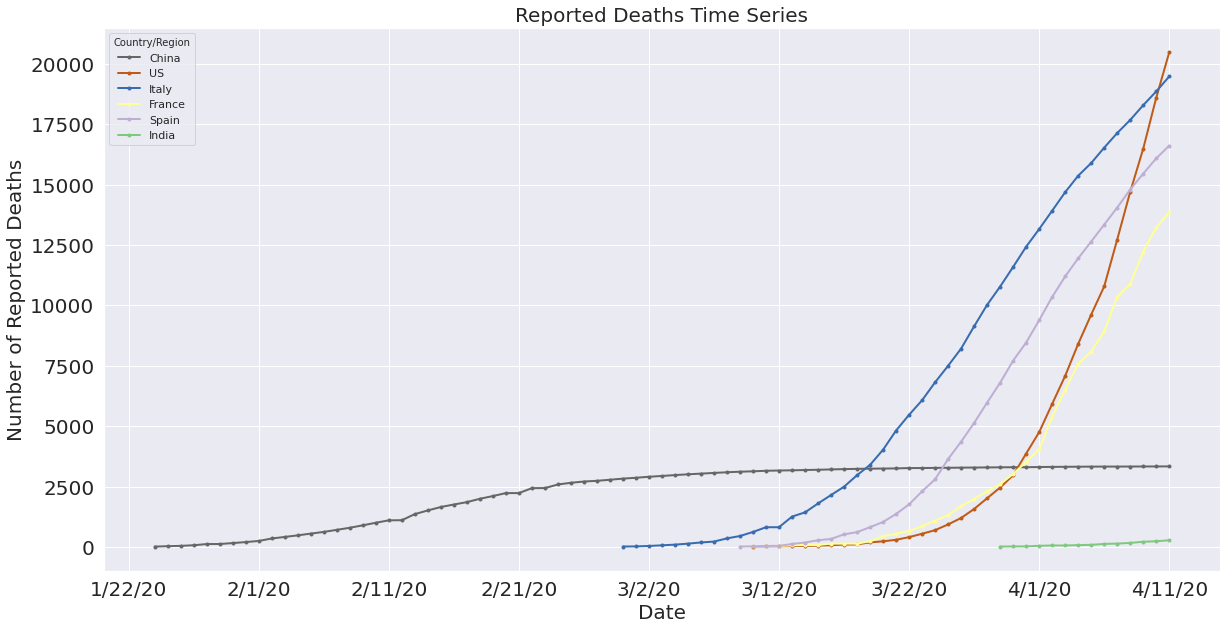

In [24]:
# Plot time series of several countries of interest
countries = ['China', 'US', 'Italy', 'France', 'Spain', 'India']
deaths_df[countries].plot(figsize=(20,10), linewidth=2, marker='.', colormap='Accent_r', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Reported Deaths', fontsize=20)
plt.title('Reported Deaths Time Series', fontsize=20)

The countries that have seen less than 25 total deaths will have columns of all NaNs now so let's drop these and then see how many columns we have left:

In [26]:
# Drop columns that are all NaNs (i.e. countries that haven't yet reached 25 deaths)
deaths_df.dropna(axis=1, how='all', inplace=True)
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 1/22/20 to 4/11/20
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Algeria                 17 non-null     float64
 1   Andorra                 3 non-null      float64
 2   Argentina               12 non-null     float64
 3   Australia               9 non-null      float64
 4   Austria                 19 non-null     float64
 5   Bangladesh              2 non-null      float64
 6   Belgium                 23 non-null     float64
 7   Bosnia and Herzegovina  6 non-null      float64
 8   Brazil                  21 non-null     float64
 9   Bulgaria                2 non-null      float64
 10  Burkina Faso            1 non-null      float64
 11  Canada                  20 non-null     float64
 12  Chile                   8 non-null      float64
 13  China                   79 non-null     float64
 14  Colombia                9 non-null    

As we're going to align the countries from the day they first had at least 25 deaths, we won't need the DateTimeIndex. In fact, we won't need the date at all. So we can 
- Reset the Index, which will give us an ordinal index (which turns the date into a regular column) and
- Drop the date column (which will be called 'index) after the reset.

In [28]:
# sort index, drop date column
deaths_df_drop = deaths_df.reset_index().drop(['index'], axis=1)
deaths_df_drop.head()

Country/Region,Algeria,Andorra,Argentina,Australia,Austria,Bangladesh,Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Burkina Faso,Canada,Chile,China,Colombia,Czechia,Denmark,Dominican Republic,Ecuador,Egypt,Finland,France,Germany,Greece,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Japan,"Korea, South",Luxembourg,Malaysia,Mexico,Moldova,Morocco,Netherlands,North Macedonia,Norway,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Romania,Russia,San Marino,Saudi Arabia,Serbia,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now it's time to shift each column so that the first entry is the first NaN value that it contains! To do this, we can use the `shift()` method on each column. How much do we shift each column, though? The magnitude of the shift is given by how many NaNs there are at the start of the column, which we can retrieve using the `first_valid_index()` method on the column **but** we want to shift **up**, which is negative in direction (by convention and perhaps intuition). SO let's do it.

In [29]:
# shift
for col in deaths_df_drop.columns:
    deaths_df_drop[col] = deaths_df_drop[col].shift(-deaths_df_drop[col].first_valid_index())
# check out head
deaths_df_drop.head()

Country/Region,Algeria,Andorra,Argentina,Australia,Austria,Bangladesh,Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Burkina Faso,Canada,Chile,China,Colombia,Czechia,Denmark,Dominican Republic,Ecuador,Egypt,Finland,France,Germany,Greece,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Japan,"Korea, South",Luxembourg,Malaysia,Mexico,Moldova,Morocco,Netherlands,North Macedonia,Norway,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Romania,Russia,San Marino,Saudi Arabia,Serbia,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Kingdom
0,25.0,25.0,27.0,28.0,28.0,27.0,37.0,29.0,25.0,25.0,27.0,25.0,27.0,26.0,25.0,31.0,32.0,28.0,27.0,30.0,25.0,33.0,28.0,26.0,26.0,27.0,25.0,26.0,27.0,36.0,26.0,29.0,27.0,28.0,29.0,26.0,28.0,27.0,25.0,43.0,26.0,25.0,26.0,30.0,30.0,25.0,31.0,33.0,26.0,30.0,25.0,25.0,28.0,28.0,25.0,28.0,25.0,27.0,26.0,25.0,30.0,28.0,27.0,56.0
1,26.0,26.0,28.0,30.0,30.0,30.0,67.0,33.0,34.0,28.0,NaN,26.0,34.0,42.0,32.0,39.0,34.0,39.0,28.0,36.0,28.0,48.0,44.0,28.0,32.0,32.0,32.0,34.0,29.0,46.0,36.0,34.0,29.0,28.0,30.0,27.0,29.0,29.0,26.0,58.0,29.0,32.0,27.0,30.0,38.0,33.0,33.0,43.0,37.0,34.0,26.0,29.0,31.0,30.0,NaN,35.0,36.0,28.0,27.0,25.0,37.0,36.0,32.0,56.0
2,29.0,26.0,36.0,35.0,49.0,NaN,75.0,34.0,46.0,NaN,NaN,30.0,37.0,56.0,35.0,44.0,41.0,42.0,34.0,40.0,27.0,48.0,67.0,32.0,34.0,35.0,38.0,43.0,36.0,54.0,40.0,52.0,29.0,35.0,31.0,35.0,37.0,29.0,33.0,77.0,30.0,39.0,34.0,32.0,55.0,35.0,43.0,60.0,43.0,43.0,26.0,34.0,39.0,36.0,NaN,54.0,62.0,41.0,30.0,28.0,44.0,40.0,37.0,72.0
3,31.0,NaN,39.0,40.0,58.0,NaN,88.0,35.0,59.0,NaN,NaN,38.0,43.0,82.0,46.0,53.0,52.0,51.0,36.0,41.0,34.0,79.0,84.0,38.0,38.0,58.0,48.0,54.0,40.0,71.0,44.0,79.0,29.0,35.0,31.0,37.0,50.0,30.0,36.0,107.0,32.0,44.0,40.0,37.0,61.0,38.0,57.0,76.0,65.0,45.0,30.0,38.0,44.0,40.0,NaN,55.0,77.0,54.0,32.0,NaN,59.0,47.0,38.0,138.0
4,35.0,NaN,43.0,45.0,68.0,NaN,122.0,36.0,77.0,NaN,NaN,54.0,48.0,131.0,50.0,59.0,65.0,57.0,48.0,46.0,40.0,91.0,94.0,43.0,47.0,72.0,49.0,66.0,42.0,85.0,49.0,107.0,33.0,42.0,36.0,43.0,60.0,NaN,39.0,137.0,34.0,50.0,41.0,41.0,73.0,45.0,71.0,100.0,82.0,47.0,30.0,41.0,51.0,43.0,NaN,133.0,105.0,75.0,33.0,NaN,75.0,54.0,45.0,178.0


Now we get to plot our time series, first with linear axes, then semi-log:

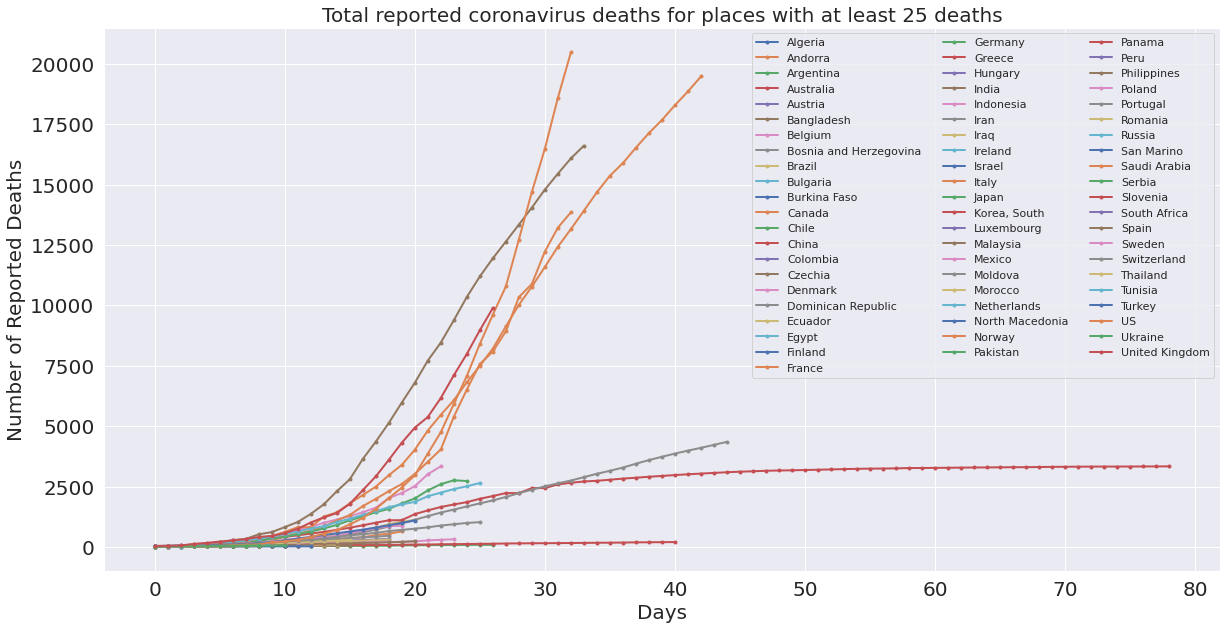

In [30]:
# Plot time series 
ax = deaths_df_drop.plot(figsize=(20,10), linewidth=2, marker=".", fontsize=20)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

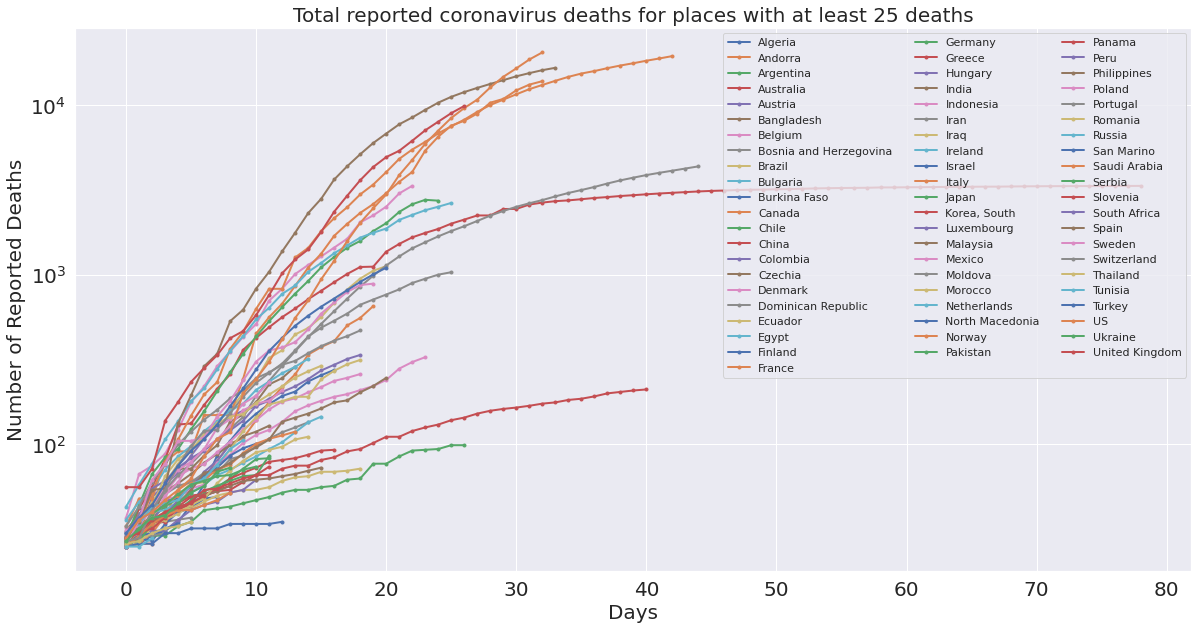

In [31]:
# Plot time series 
ax = deaths_df_drop.plot(figsize=(20,10), linewidth=2, marker=".", fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

**Note:** although the plot is what we wanted, the above plots are challenging to retrieve any meaningful information from. 
There are too many growth curves so that it's very crowded **and** too many colours look the same so it's difficult to tell which country is which from the legend. 
So, I'll plot less curves now and further down in the notebook I'll use the python package Altair to introduce interactivity.

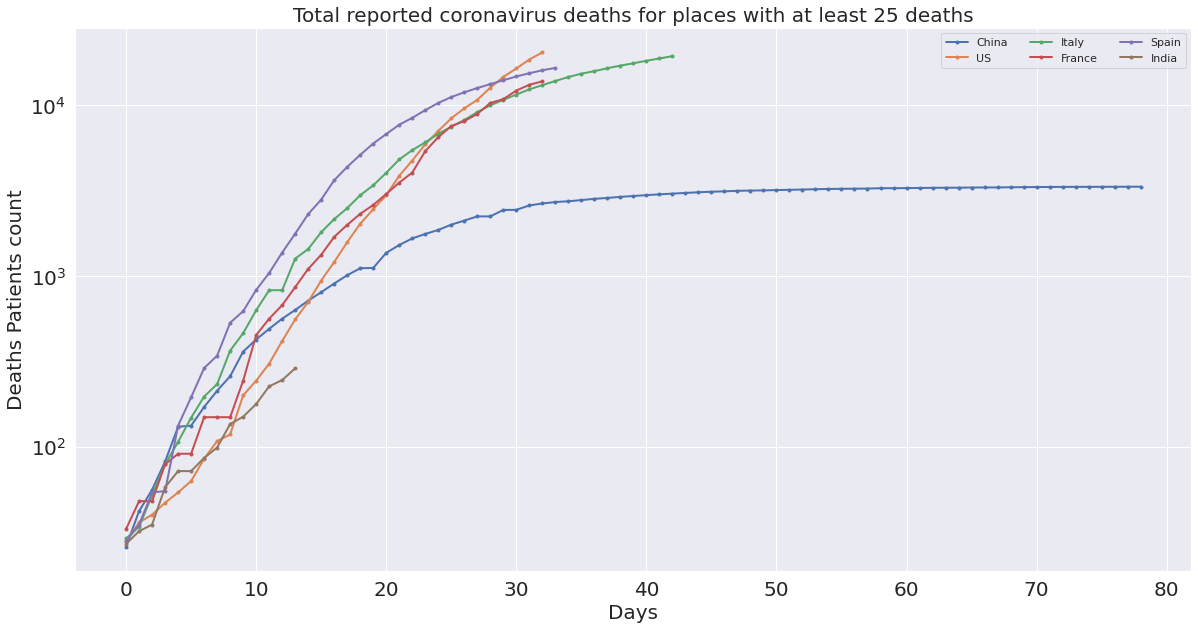

In [32]:
# Plot semi log time series 
ax = deaths_df_drop[countries].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

Till Now, We  
- looked at the dataset containing the number of reported deaths for each region,
- wrangled the data to look at the number of reported deaths by country,
- plotted the number of reported deaths by country on linear and log scale.
- aligned growth curves to start with day of number of known deaths ≥ 25.

### Plotting number of recovered people

The third dataset in the Hopkins repository is the number of recovered. We want to do similar data wrangling as in the two cases above so we *could* copy and paste our code again *but*, if you're writing the same code three times, it's likely time to write a function.

In [0]:
# Function for grouping countries by region
def group_by_country(raw_data):
    
    # Group by
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [0]:
# Function to align growth curves
def align_curves(data, min_val):
    
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        data.loc[(data[col] < min_val), col] = None
    # Drop columns with all NaNs
    data.dropna(axis=1, how="all", inplace=True)
    # Reset index, drop date
    data = data.reset_index().drop(['index'], axis=1)
    # Shift each column to begin with first valid index
    for col in data.columns:
        data[col] = data[col].shift(-data[col].first_valid_index())
    return data

In [0]:
# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

Trying these functions at work on the 'number of deaths' data:

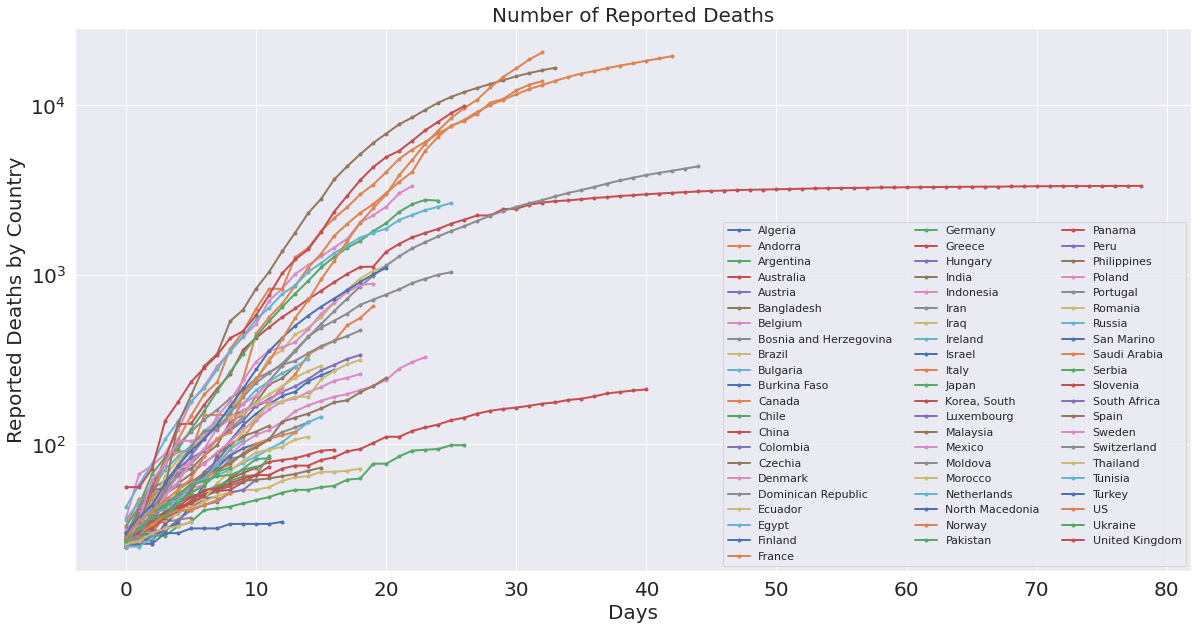

In [36]:
deaths_country_drop = (group_by_country(raw_deaths_df))
deaths_country_drop = align_curves(deaths_country_drop, min_val=25)
plot_time_series(deaths_country_drop, 'Number of Reported Deaths', 'Days', 'Reported Deaths by Country', logy=True)

Now let's check use our functions to group, wrangle, and plot the recovered patients data:

In [37]:
# group by country and check out tail
recovered_df = group_by_country(raw_recovered_df)
recovered_df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-07,18,131,113,39,2,0,338,87,1080,4046,44,5,458,33,6,54,4157,0,5,2,2,68,0,127,85,42,127,0,0,1,58,43,3791,0,2,898,77410,100,2,9,...,615,105,0,0,0,377,13,102,1,95,0,43208,42,2,0,205,8704,3,57,5,888,0,23,1,25,1582,21763,0,28,186,325,150,30,65,123,42,0,0,7,0
2020-04-08,29,154,237,52,2,0,358,114,1080,4512,63,5,477,33,8,77,4681,0,5,2,2,79,0,127,91,42,134,0,0,1,63,60,4154,0,2,1115,77567,123,2,9,...,631,113,0,0,0,406,16,120,1,95,0,48021,44,2,3,205,9800,4,61,5,888,0,23,1,25,1846,23559,0,35,239,345,150,30,65,126,44,0,0,7,0
2020-04-09,32,165,347,58,2,0,365,138,1472,5240,101,5,519,33,11,139,5164,0,5,2,2,101,0,173,92,48,146,2,0,1,62,60,5162,0,2,1274,77679,174,5,9,...,666,123,0,0,0,460,23,128,1,95,0,52165,49,2,4,205,10600,4,67,5,940,0,24,1,25,2142,25410,0,45,268,359,192,38,84,128,44,0,0,24,0
2020-04-10,32,182,405,71,2,0,375,149,1793,6064,159,5,539,33,11,169,5568,0,5,2,2,129,0,173,99,54,146,2,0,1,72,98,5855,0,2,1571,77791,197,5,13,...,685,137,0,0,0,492,23,137,1,410,0,55668,54,2,4,381,11100,4,91,5,1013,1,25,1,25,2423,28790,0,61,418,588,206,42,84,144,45,0,0,25,0
2020-04-11,32,197,460,71,4,0,440,173,1806,6604,200,5,555,36,11,172,5986,0,5,2,2,139,0,173,104,62,155,2,0,1,75,98,6589,0,2,1864,77877,214,5,16,...,720,152,0,0,0,528,23,148,1,410,0,59109,54,2,4,381,12100,5,99,5,1135,1,25,12,43,2965,31270,4,79,588,622,214,42,93,144,57,0,0,28,0


In [38]:
# align curves and check out head
recovered_df_drop = align_curves(recovered_df, min_val=25)
recovered_df_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Chile,China,Colombia,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominican Republic,Ecuador,Egypt,Estonia,Finland,France,Georgia,...,Netherlands,New Zealand,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,San Marino,Saudi Arabia,Senegal,Singapore,Slovenia,South Africa,Spain,Sri Lanka,Sweden,Switzerland,Taiwan*,Thailand,Togo,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia
0,29.0,31.0,32.0,26.0,52.0,28.0,26.0,112.0,26.0,35.0,25.0,29.0,31.0,27.0,120.0,25.0,25.0,31.0,25.0,43.0,110.0,43.0,28.0,31.0,29.0,25.0,37.0,27.0,28.0,25.0,36.0,40.0,25.0,33.0,54.0,27.0,26.0,300.0,2206.0,26.0,...,253.0,27.0,26.0,25.0,30.0,32.0,29.0,29.0,53.0,26.0,47.0,43.0,27.0,25.0,29.0,27.0,28.0,27.0,29.0,70.0,31.0,30.0,27.0,103.0,131.0,26.0,28.0,25.0,25.0,26.0,105.0,25.0,26.0,53.0,41.0,25.0,31.0,25.0,25.0,25.0
1,32.0,31.0,32.0,31.0,52.0,30.0,26.0,225.0,26.0,35.0,25.0,29.0,31.0,30.0,127.0,34.0,30.0,32.0,34.0,60.0,183.0,61.0,30.0,39.0,30.0,37.0,45.0,27.0,28.0,45.0,41.0,40.0,25.0,36.0,58.0,27.0,33.0,300.0,2206.0,28.0,...,253.0,37.0,26.0,25.0,30.0,32.0,34.0,29.0,394.0,28.0,56.0,43.0,33.0,25.0,38.0,35.0,29.0,27.0,34.0,70.0,31.0,30.0,33.0,103.0,131.0,26.0,28.0,25.0,25.0,26.0,121.0,28.0,31.0,67.0,41.0,25.0,39.0,55.0,NaN,28.0
2,32.0,33.0,32.0,39.0,63.0,30.0,26.0,225.0,26.0,44.0,25.0,32.0,NaN,30.0,127.0,38.0,34.0,46.0,35.0,60.0,184.0,75.0,36.0,55.0,42.0,41.0,52.0,28.0,28.0,61.0,50.0,40.0,36.0,50.0,65.0,27.0,45.0,300.0,3250.0,36.0,...,253.0,50.0,28.0,33.0,35.0,32.0,34.0,76.0,394.0,31.0,56.0,43.0,33.0,52.0,45.0,35.0,33.0,40.0,34.0,79.0,31.0,32.0,38.0,205.0,131.0,28.0,28.0,NaN,25.0,42.0,147.0,28.0,31.0,67.0,62.0,25.0,39.0,58.0,42.0,NaN
3,32.0,44.0,65.0,52.0,72.0,30.0,88.0,479.0,26.0,44.0,26.0,32.0,263.0,47.0,127.0,45.0,37.0,50.0,50.0,98.0,256.0,156.0,39.0,55.0,49.0,41.0,67.0,51.0,33.0,67.0,57.0,40.0,36.0,80.0,65.0,27.0,48.0,300.0,3907.0,36.0,...,260.0,56.0,40.0,35.0,37.0,32.0,57.0,76.0,537.0,35.0,116.0,43.0,41.0,64.0,49.0,40.0,35.0,45.0,37.0,79.0,31.0,32.0,42.0,205.0,131.0,28.0,31.0,NaN,25.0,70.0,176.0,28.0,38.0,67.0,68.0,30.0,39.0,63.0,44.0,NaN
4,NaN,52.0,65.0,58.0,72.0,30.0,88.0,636.0,32.0,60.0,30.0,32.0,263.0,68.0,127.0,52.0,39.0,50.0,50.0,98.0,466.0,156.0,49.0,85.0,NaN,48.0,67.0,77.0,37.0,72.0,57.0,40.0,NaN,98.0,100.0,NaN,59.0,300.0,4955.0,39.0,...,260.0,63.0,41.0,44.0,41.0,32.0,57.0,94.0,537.0,42.0,134.0,43.0,41.0,64.0,64.0,40.0,37.0,55.0,37.0,102.0,31.0,183.0,44.0,205.0,131.0,28.0,31.0,NaN,43.0,105.0,178.0,35.0,38.0,67.0,93.0,30.0,39.0,75.0,44.0,NaN


Plot time series:

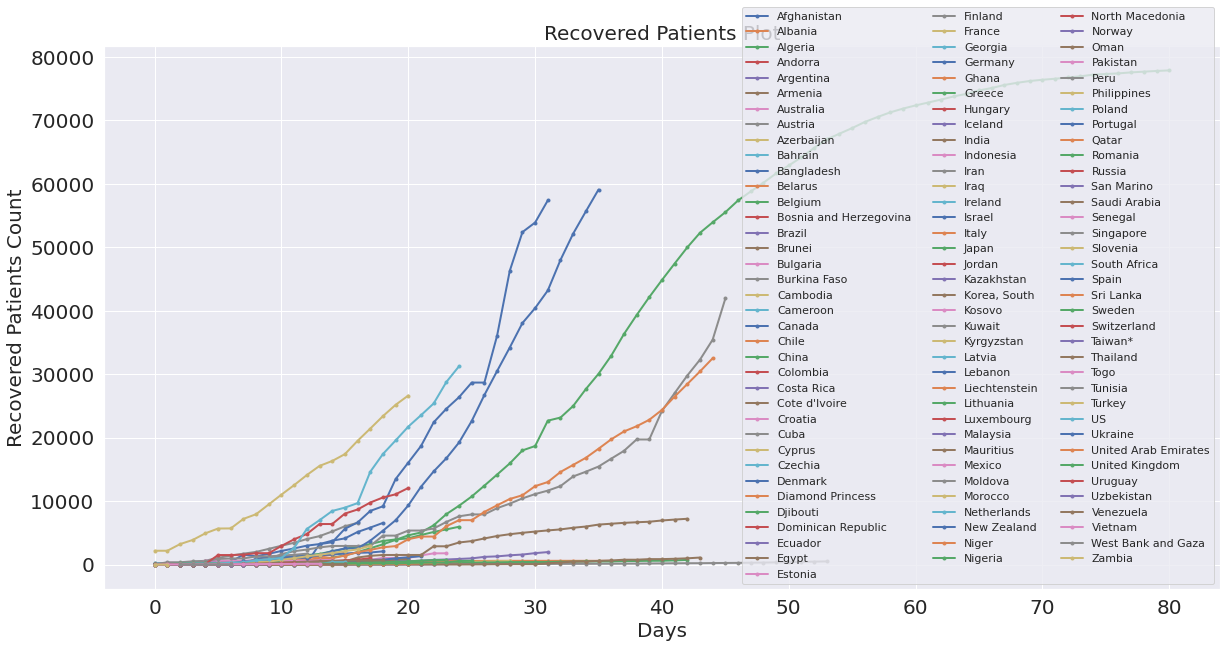

In [39]:
plot_time_series(recovered_df_drop, 'Recovered Patients Plot', 'Days', 'Recovered Patients Count')

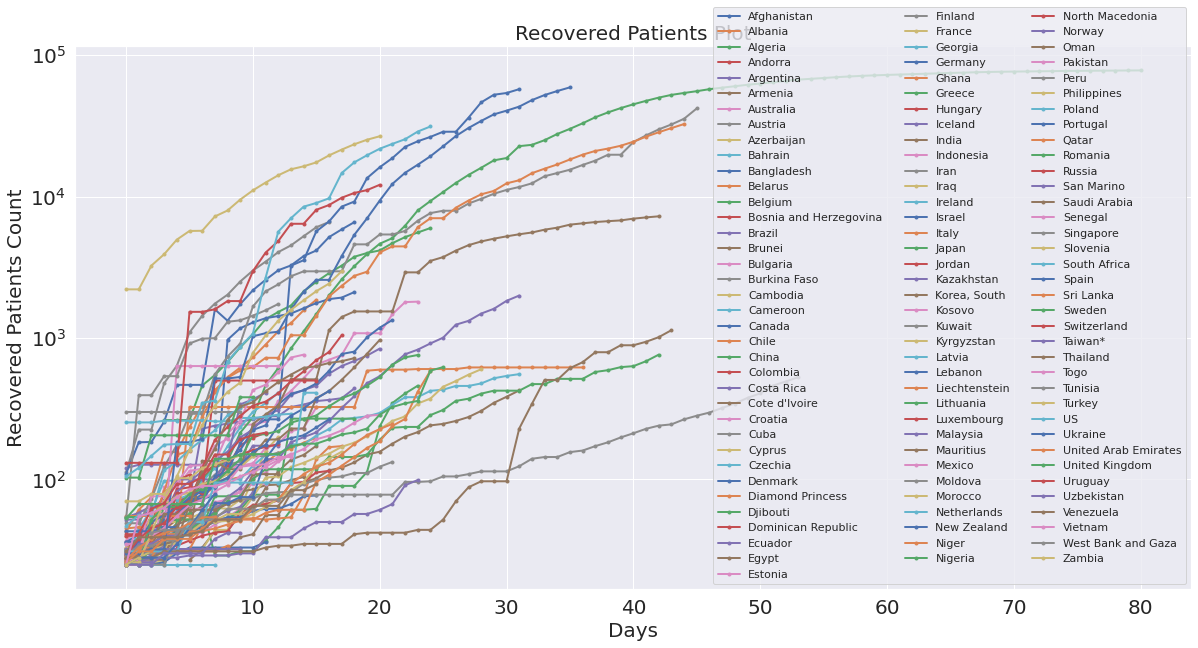

In [40]:
plot_time_series(recovered_df_drop, 'Recovered Patients Plot', 'Days', 'Recovered Patients Count', True)

### Since this plot gets messed up because of the number of countries, I will again go with the selective ones.

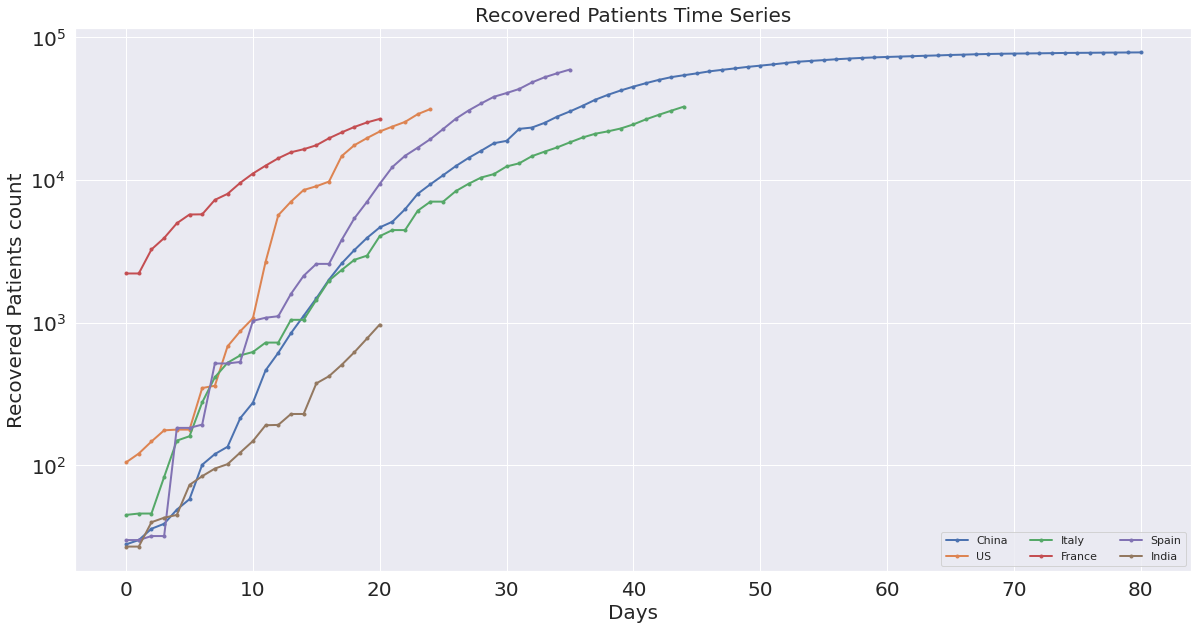

In [41]:
plot_time_series(recovered_df_drop[countries], 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

Now, I looked at the dataset containing the number of reported recoveries for each region, written function for grouping, wrangling, and plotting the data along with using these functions.
 

## Interactive plots with altair

Now for some interactive data visualizations, I will be using Altair which can produce visualizations similar to [this one in the NYTimes](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html), a chart of confirmed number of deaths by country for places with at least 25 deaths, similar to the one above, but with informative hover tools. 
[This one](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html) is also really good.



Before going to Altair, I will reshape our `deaths_df` dataset. Notice that it's currently in **wide data format**, with a column for each country and a row for each "day" (where day 1 is the first day with over 25 confirmed deaths).

In [42]:
# Look at head
deaths_df_drop.head()

Country/Region,Algeria,Andorra,Argentina,Australia,Austria,Bangladesh,Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Burkina Faso,Canada,Chile,China,Colombia,Czechia,Denmark,Dominican Republic,Ecuador,Egypt,Finland,France,Germany,Greece,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Japan,"Korea, South",Luxembourg,Malaysia,Mexico,Moldova,Morocco,Netherlands,North Macedonia,Norway,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Romania,Russia,San Marino,Saudi Arabia,Serbia,Slovenia,South Africa,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Kingdom
0,25.0,25.0,27.0,28.0,28.0,27.0,37.0,29.0,25.0,25.0,27.0,25.0,27.0,26.0,25.0,31.0,32.0,28.0,27.0,30.0,25.0,33.0,28.0,26.0,26.0,27.0,25.0,26.0,27.0,36.0,26.0,29.0,27.0,28.0,29.0,26.0,28.0,27.0,25.0,43.0,26.0,25.0,26.0,30.0,30.0,25.0,31.0,33.0,26.0,30.0,25.0,25.0,28.0,28.0,25.0,28.0,25.0,27.0,26.0,25.0,30.0,28.0,27.0,56.0
1,26.0,26.0,28.0,30.0,30.0,30.0,67.0,33.0,34.0,28.0,NaN,26.0,34.0,42.0,32.0,39.0,34.0,39.0,28.0,36.0,28.0,48.0,44.0,28.0,32.0,32.0,32.0,34.0,29.0,46.0,36.0,34.0,29.0,28.0,30.0,27.0,29.0,29.0,26.0,58.0,29.0,32.0,27.0,30.0,38.0,33.0,33.0,43.0,37.0,34.0,26.0,29.0,31.0,30.0,NaN,35.0,36.0,28.0,27.0,25.0,37.0,36.0,32.0,56.0
2,29.0,26.0,36.0,35.0,49.0,NaN,75.0,34.0,46.0,NaN,NaN,30.0,37.0,56.0,35.0,44.0,41.0,42.0,34.0,40.0,27.0,48.0,67.0,32.0,34.0,35.0,38.0,43.0,36.0,54.0,40.0,52.0,29.0,35.0,31.0,35.0,37.0,29.0,33.0,77.0,30.0,39.0,34.0,32.0,55.0,35.0,43.0,60.0,43.0,43.0,26.0,34.0,39.0,36.0,NaN,54.0,62.0,41.0,30.0,28.0,44.0,40.0,37.0,72.0
3,31.0,NaN,39.0,40.0,58.0,NaN,88.0,35.0,59.0,NaN,NaN,38.0,43.0,82.0,46.0,53.0,52.0,51.0,36.0,41.0,34.0,79.0,84.0,38.0,38.0,58.0,48.0,54.0,40.0,71.0,44.0,79.0,29.0,35.0,31.0,37.0,50.0,30.0,36.0,107.0,32.0,44.0,40.0,37.0,61.0,38.0,57.0,76.0,65.0,45.0,30.0,38.0,44.0,40.0,NaN,55.0,77.0,54.0,32.0,NaN,59.0,47.0,38.0,138.0
4,35.0,NaN,43.0,45.0,68.0,NaN,122.0,36.0,77.0,NaN,NaN,54.0,48.0,131.0,50.0,59.0,65.0,57.0,48.0,46.0,40.0,91.0,94.0,43.0,47.0,72.0,49.0,66.0,42.0,85.0,49.0,107.0,33.0,42.0,36.0,43.0,60.0,NaN,39.0,137.0,34.0,50.0,41.0,41.0,73.0,45.0,71.0,100.0,82.0,47.0,30.0,41.0,51.0,43.0,NaN,133.0,105.0,75.0,33.0,NaN,75.0,54.0,45.0,178.0


For Altair, we'll want to convert the data into **long data format**. What this will do essentially have a row for each country/day pair so our columns will be 'Day', 'Country', and number of 'Deaths'. We do this using the dataframe method `.melt()` as follows:

In [43]:
# create long data for deaths
deaths_long = deaths_df_drop.reset_index().melt(id_vars='index', value_name='Deaths').rename(columns={'index':'Day'}) 
deaths_long.head()

,Day,Country/Region,Deaths
0,0,Algeria,25.0
1,1,Algeria,26.0
2,2,Algeria,29.0
3,3,Algeria,31.0
4,4,Algeria,35.0


In [45]:
deaths_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day             5184 non-null   int64  
 1   Country/Region  5184 non-null   object 
 2   Deaths          1081 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


We'll see the power of having long data when using Altair.
Now having transformed our data, let's import Altair and get a sense of its API.

In [46]:
import altair as alt

alt.data_transformers.disable_max_rows() 
#This particular line of code is to be used when we have more than 5000 rows in our dataset and is vailable in Altair Documentation.
#This limit has just been set to prevent our notebook from growing excessive in size.

# altair plotting
alt.Chart(deaths_long).mark_line().encode(
    x='Day',
    y='Deaths',
    color='Country/Region')



alt.Chart(...)

So, we have successfully made the plot.

The [Altair documentation states](https://altair-viz.github.io/getting_started/overview.html),

> The key idea is that you are declaring links between *data columns* and *visual encoding channels*, such as the x-axis, y-axis, color, etc. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated plots and visualizations can be created using a relatively concise grammar.

I can now customize the code to thicken the line width, to alter the opacity, and to make the chart larger:

In [47]:
# altair plot 
alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x='Day',
    y='Deaths',
    color='Country/Region'
).properties(
    width=800, height=650
)

alt.Chart(...)

We can also add a log y-axis. To do this, The long-form, we express the types using the long-form `alt.X('Day',...)`, which is, in the words of the [Altair documentation](https://altair-viz.github.io/user_guide/encoding.html)
> useful when doing more fine-tuned adjustments to the encoding, such as binning, axis and scale properties, or more.

We'll also now add a hover tooltip so that, when we hover our cursor over any point on any of the lines, it will tell us the 'Country', the 'Day', and the number of 'Deaths'.

In [48]:
# altair plot 
alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)

alt.Chart(...)

It's great that we could add that useful hover tooltip with one line of code `tooltip=['Country/Region', 'Day','Deaths']`, particularly as it adds such information rich interaction to the chart.
One useful aspect of the NYTimes chart was that, when you hovered over a particular curve, it made it stand out against the other. We're going to do something similar here: in the resulting chart, when you click on a curve, the others turn grey.

**Note:** When first attempting to build this chart, I discovered [here](https://github.com/altair-viz/altair/issues/1552) that "multiple conditional values in one encoding are not allowed by the Vega-Lite spec," which is what Altair uses. For this reason, we build the chart, then an overlay, and then combine them.

In [49]:
# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
    color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Sum em up!
chart + overlay

alt.LayerChart(...)

It's not super easy to line up the legend with the curves on the chart so let's put the labels on the chart itself. 

In [50]:
# drop NaNs
deaths_long = deaths_long.dropna()

# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color=alt.Color('Country/Region', legend=None),
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
  color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Text labels
text = base.mark_text(
    align='left',
    dx=5,
    size=10
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Day')),
    y=alt.Y('Deaths', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Reported Deaths')),
    text='Country/Region',  
).transform_filter(
    selection
)

# Sum em up!
chart + overlay + text

alt.LayerChart(...)

**Summary:** So, now we have 
- melted the data into long format,
- used Altair to make interactive plots of increasing richness,


Thank You!
You can check out [my github](https://www.github.com/hritikbhandari) for more interesting EDAs and projects.